In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [265]:
data=pd.read_csv("dataset/best/Bengaluru_House_Data.csv")
print(data.shape)
data.head(20)

(13129, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


# droping the socity,availability,location column


In [266]:
data=data.drop(['society','availability','location'],axis=1)
data.head(20)
maxi=data['price'].max()
maxi

3600.0

In [267]:
data['total_sqft'] = pd.to_numeric(data['total_sqft'], errors='coerce')
data.dtypes

area_type      object
size           object
total_sqft    float64
bath          float64
balcony       float64
price         float64
dtype: object

In [268]:
#filling the missing values or solving the problem of the nan assigning the nan value with the mean of that column
print(data.isnull().sum())
data=data.fillna(data.mean())
print(data.isnull().sum())
data.head(20)

area_type       0
size            9
total_sqft      2
bath           30
balcony       562
price           0
dtype: int64
area_type     0
size          9
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64


,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056.0,2.0,1.000000,39.07
1,Plot Area,4 Bedroom,2600.0,5.0,3.000000,120.00
2,Built-up Area,3 BHK,1440.0,2.0,3.000000,62.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.000000,95.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.000000,51.00
5,Super built-up Area,2 BHK,1170.0,2.0,1.000000,38.00
6,Super built-up Area,4 BHK,2732.0,4.0,1.598711,204.00
7,Super built-up Area,4 BHK,3300.0,4.0,1.598711,600.00
8,Super built-up Area,3 BHK,1310.0,3.0,1.000000,63.25
9,Plot Area,6 Bedroom,1020.0,6.0,1.598711,370.00


In [269]:
#now droping the row having null values
data=data.dropna(axis=0)
data

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056.0,2.0,1.000000,39.07
1,Plot Area,4 Bedroom,2600.0,5.0,3.000000,120.00
2,Built-up Area,3 BHK,1440.0,2.0,3.000000,62.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.000000,95.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.000000,51.00
...,...,...,...,...,...,...
13124,Built-up Area,5 Bedroom,3453.0,4.0,0.000000,231.00
13125,Super built-up Area,4 BHK,3600.0,5.0,1.598711,400.00
13126,Built-up Area,2 BHK,1141.0,2.0,1.000000,60.00
13127,Super built-up Area,4 BHK,4689.0,4.0,1.000000,488.00


In [270]:
print(data.isnull().sum())

area_type     0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64


In [271]:
print(len(data['size'].unique()))
#print(len(data['location'].unique()))
#print(len(data['availability'].unique()))
print(len(data['area_type'].unique()))

31
4


In [272]:
#model training
x=data.drop(['price'],axis=1)
y=data['price']
x.head(30)

,area_type,size,total_sqft,bath,balcony
0,Super built-up Area,2 BHK,1056.0,2.0,1.000000
1,Plot Area,4 Bedroom,2600.0,5.0,3.000000
2,Built-up Area,3 BHK,1440.0,2.0,3.000000
3,Super built-up Area,3 BHK,1521.0,3.0,1.000000
4,Super built-up Area,2 BHK,1200.0,2.0,1.000000
5,Super built-up Area,2 BHK,1170.0,2.0,1.000000
6,Super built-up Area,4 BHK,2732.0,4.0,1.598711
7,Super built-up Area,4 BHK,3300.0,4.0,1.598711
8,Super built-up Area,3 BHK,1310.0,3.0,1.000000
9,Plot Area,6 Bedroom,1020.0,6.0,1.598711


In [273]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encoder1=LabelEncoder()
encoder1.fit(x[['area_type']])
x['area_type']=encoder1.transform(x[['area_type']])
encoder2=LabelEncoder()
encoder2.fit(x[['size']])
x['size']=encoder2.transform(x[['size']])
x

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,area_type,size,total_sqft,bath,balcony
0,3,13,1056.0,2.0,1.000000
1,2,19,2600.0,5.0,3.000000
2,0,16,1440.0,2.0,3.000000
3,3,16,1521.0,3.0,1.000000
4,3,13,1200.0,2.0,1.000000
...,...,...,...,...,...
13124,0,22,3453.0,4.0,0.000000
13125,3,18,3600.0,5.0,1.598711
13126,0,13,1141.0,2.0,1.000000
13127,3,18,4689.0,4.0,1.000000


In [274]:
x.isnull().sum()

area_type     0
size          0
total_sqft    0
bath          0
balcony       0
dtype: int64

# Spliting the data into training  and testing data 


In [275]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)
y_train.max()

3600.0

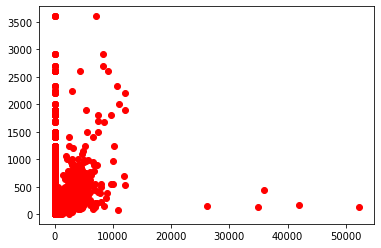

In [285]:
import matplotlib.pyplot as plt
plt.scatter(x_train['size'],y_train,color='red')
plt.scatter(x_train['area_type'],y_train,color='red')
plt.scatter(x_train['total_sqft'],y_train,color='red')
plt.scatter(x_train['bath'],y_train,color='red')
plt.scatter(x_train['balcony'],y_train,color='red')
plt.show()

# applying the linearRegression

In [277]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(normalize=True)
regressor.fit(x_train,y_train)
sco=regressor.score(x_train,y_train)
print('coefficients=',regressor.coef_,'intercept=',regressor.intercept_)
print('score=',sco)

coefficients= [ 0.42595386  0.47990013  0.04608991 31.67442094 -0.41018961] intercept= -53.03055567986739
score= 0.34362703640473047


# predictions and accuracy for train data

In [278]:
y_pred_train=regressor.predict(x_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})
df

,Actual,Predicted
11548,80.99,112.349971
10226,109.00,137.238523
7384,69.00,78.246674
4817,90.00,122.720201
3647,95.00,80.785596
...,...,...
10963,90.00,123.872449
906,69.00,71.534215
5194,95.00,128.891629
12181,42.09,38.577313


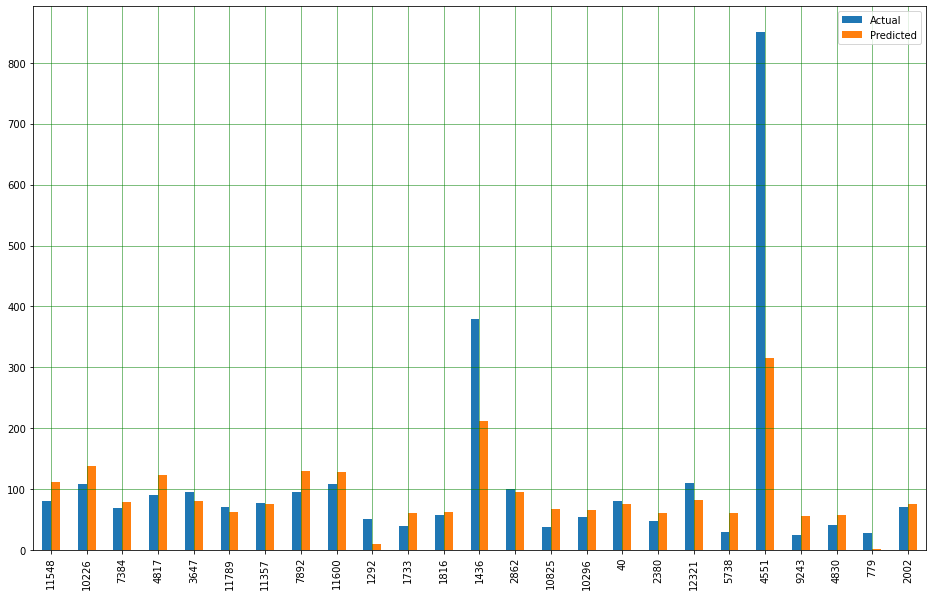

In [279]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# prediction and accuracy for test data

In [280]:
sco2=regressor.score(x_test,y_test)
print(sco2)
y_pred_test=regressor.predict(x_test)
dfn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
dfn


0.4692855554857393


,Actual,Predicted
10178,70.00,86.245330
13069,120.00,82.004661
1791,39.00,60.389696
12884,219.00,152.717633
142,105.00,122.579616
...,...,...
8203,56.34,90.584881
6530,120.00,129.914846
2378,52.00,68.123562
12664,125.00,128.854778


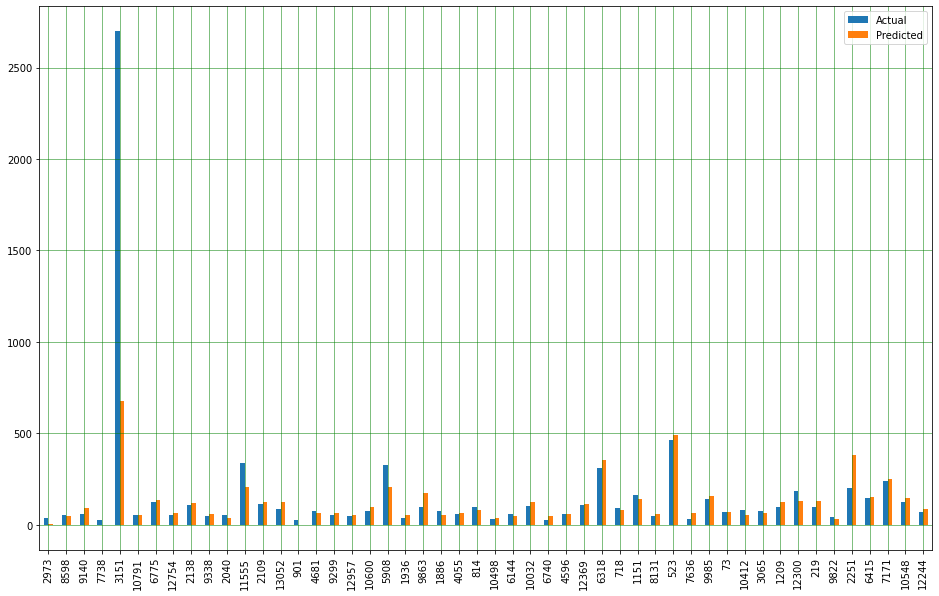

In [238]:
df2 = dfn.head(50)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

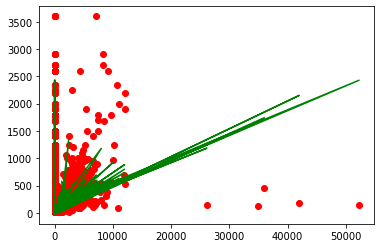

In [287]:
plt.figure()
plt.scatter(x_train['size'],y_train,color='red')
plt.scatter(x_train['area_type'],y_train,color='red')
plt.scatter(x_train['total_sqft'],y_train,color='red')
plt.scatter(x_train['bath'],y_train,color='red')
plt.scatter(x_train['balcony'],y_train,color='red')
plt.plot(x_train,y_pred_train,color='green')
#plt.show()
#plt.plot(x_train,y_train)

In [96]:
from sklearn.metrics import explained_variance_score
var=explained_variance_score(y_train,y_pred_train)
print(var)

0.4666238379094617


In [ ]:
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

In [ ]:
normalize=False